# Imports

In [105]:
import numpy as np
import plotly.io as pio

import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import sklearn 
import os
from matplotlib import cm as colours 
from colorama import Fore, Back, Style
from scipy.stats import sem
import joblib
import umap.umap_ as umap
from sklearn.manifold import trustworthiness
from sklearn.metrics import silhouette_samples
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from plotly.subplots import make_subplots
import pickle 
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
from sklearn.utils import shuffle


from fig3_utils import*


# Loading Data

In [106]:
# load the data for both mfa and normal annotations 
# dictionary structure is patient_data[patient][position][method][hg_trace, hg_map, phon_seq]
# you can access the data as follows: patient_data['S14']['p1']['Kumar']['hg_trace'] etc. 

patient_data = fetch_patient_data(r"Pickle Files\patient_data.pkl")


Loaded patient_data from pickle.


# Useful Dictionaries and Functions

In [107]:
numtoPhon = {1:'a', 2:'ae', 3:'i', 4:'u', 5:'b', 6:'p', 7:'v', 8:'g', 9:'k'}
phoneme_group = {
        'a': 'low', 'ae': 'low', 'i': 'high', 'u': 'high',
        'b': 'labial', 'p': 'labial', 'v': 'labial',
        'g': 'dorsal', 'k': 'dorsal'
    }


## CP

In [108]:
patients = ['S14', 'S26']
positions =['p1', 'p2', 'p3', 'all']
methods = ['Kumar', 'MFA']

In [109]:
patient_data['S14']['p1']["Kumar"]['hg_trace'].shape

(144, 200, 111)

In [110]:
runs14 = False
if runs14:
    Xys_df = get_training_data('S14', 'p1', 'Kumar')
    for i in range(1,11):
        tsne_df = run_tsne(Xys_df, 50, 0.8, i)
        run_plottly(tsne_df, 'Phoneme', height=800, width=1600)

In [111]:
if False:
    Xys_df_km = get_training_data(patient_data, 'S26', 'p1', 'Kumar')
    Xys_df_mfa = get_training_data(patient_data, 'S26', 'p1', 'MFA')
    for i in range(1,21):
        tsne_df_km = run_tsne(Xys_df_km, 50, 0.8, i)
        tsne_df_mfa = run_tsne(Xys_df_mfa, 50, 0.8, i)
        
        run_plottly(tsne_df_km, 'Phoneme')
        run_plottly(tsne_df_mfa, 'Phoneme')

# Silhoutte Score Distributions

In [112]:
if True:
    patients = ['S26', 'S22', 'S23', 'S33']
    methods = ['Kumar', 'MFA']
    position = 'p1'
    perp = 50
    silscores = {}
    for patient in patients:
        silscores[patient] = {}
        for method in methods:
            silscores[patient][method] = {
                'Silhoutte_Score_PhonType': [],
                'Silhoutte_Score_PhonGrp': [],
                'Silhoutte_Score_Phon': [], 
                'Silhouette_Score_PhonChance': []
            }
            Xys_df = get_training_data(patient_data, patient, position, method)
            if patient == 'S33':
                perp = 30
            for i in range(1, 51): 
                tsne_df = run_tsneShuffledY(Xys_df, perp, 0.8, i)
                silscores[patient][method]['Silhoutte_Score_PhonType'].append(tsne_df['Silhoutte_Score_PhonType'].iloc[0])
                silscores[patient][method]['Silhoutte_Score_PhonGrp'].append(tsne_df['Silhoutte_Score_PhonGrp'].iloc[0])
                silscores[patient][method]['Silhoutte_Score_Phon'].append(tsne_df['Silhoutte_Score_Phon'].iloc[0])
                silscores[patient][method]['Silhouette_Score_PhonChance'].append(tsne_df['Silhouette_Score_PhonChance'].iloc[0])
# save silscores to pickle
# pkl_path_silscores = r"Data Analysis\Pickle Files\silscores_allPatients.pkl"
# with open(pkl_path_silscores, "wb") as f:
#     pickle.dump(silscores, f)
# print("Saved silscores to pickle.")

c:\Users\Nabiya\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

c:\Users\Nabiya\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in divide

c:\Users\Nabiya\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

c:\Users\Nabiya\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in divide



In [113]:
print(tsne_df.columns.tolist())

['#Run', 'tsne-1', 'tsne-2', 'Phoneme', 'Phoneme_Position', 'Phoneme_Type', 'Phoneme_Group', 'Perplexity', 'KL_Divergence', 'Silhoutte_Score_Phon', 'Silhouette_Score_PhonChance', 'Silhoutte_Score_PhonType', 'Silhoutte_Score_PhonGrp', 'Patient', 'Method']


In [114]:
silscores.items()

dict_items([('S26', {'Kumar': {'Silhoutte_Score_PhonType': [0.31257567, 0.30306518, 0.3014932, 0.3111206, 0.17653142, 0.2924199, 0.30213994, 0.33189133, 0.3028991, 0.2968673, 0.30297825, 0.31034294, 0.3156479, 0.18408757, 0.30099165, 0.25401536, 0.31146085, 0.31053975, 0.30266538, 0.30857018, 0.30201688, 0.30980575, 0.16466863, 0.07062331, 0.31008106, 0.28855208, 0.30718958, 0.290578, 0.31208044, 0.2944937, 0.28014308, 0.30140167, 0.3005105, 0.3031765, 0.14447223, 0.30180767, 0.2998224, 0.15338609, 0.24721351, 0.29240385, 0.31109825, 0.069032535, 0.3029562, 0.3044016, 0.30639282, 0.30938026, 0.30778196, 0.29774272, 0.25497368, 0.17608519], 'Silhoutte_Score_PhonGrp': [0.17964008, 0.16965908, 0.1592575, 0.17658986, 0.15652181, 0.16437837, 0.1597689, 0.21524368, 0.15962894, 0.16717607, 0.15099415, 0.17513959, 0.22031355, 0.09890075, 0.17016079, 0.1560095, 0.17559679, 0.17506069, 0.15961902, 0.20805204, 0.16011326, 0.16898406, 0.1591131, 0.06380328, 0.14548427, 0.15318249, 0.16842587, 0.24

In [115]:
for e in silscores['S26']['Kumar'].items():
    print(e)

('Silhoutte_Score_PhonType', [0.31257567, 0.30306518, 0.3014932, 0.3111206, 0.17653142, 0.2924199, 0.30213994, 0.33189133, 0.3028991, 0.2968673, 0.30297825, 0.31034294, 0.3156479, 0.18408757, 0.30099165, 0.25401536, 0.31146085, 0.31053975, 0.30266538, 0.30857018, 0.30201688, 0.30980575, 0.16466863, 0.07062331, 0.31008106, 0.28855208, 0.30718958, 0.290578, 0.31208044, 0.2944937, 0.28014308, 0.30140167, 0.3005105, 0.3031765, 0.14447223, 0.30180767, 0.2998224, 0.15338609, 0.24721351, 0.29240385, 0.31109825, 0.069032535, 0.3029562, 0.3044016, 0.30639282, 0.30938026, 0.30778196, 0.29774272, 0.25497368, 0.17608519])
('Silhoutte_Score_PhonGrp', [0.17964008, 0.16965908, 0.1592575, 0.17658986, 0.15652181, 0.16437837, 0.1597689, 0.21524368, 0.15962894, 0.16717607, 0.15099415, 0.17513959, 0.22031355, 0.09890075, 0.17016079, 0.1560095, 0.17559679, 0.17506069, 0.15961902, 0.20805204, 0.16011326, 0.16898406, 0.1591131, 0.06380328, 0.14548427, 0.15318249, 0.16842587, 0.24301393, 0.1750153, 0.17879704

In [116]:
len(silscores['S26']['Kumar'])

4

In [117]:
e[0]

'Silhouette_Score_PhonChance'

In [118]:
# # Flatten the dict for DataFrame creation
# records = []
# for patient in patients:
#     for method, category in silscores[patient]:
#         # we are now inside the data for patient
#         # each patient has two methods, 
#         each 
#         for i in range(len(scores['Silhoutte_Score_Phon'])):
#             records.append({
#                 'Patient': patient,
#                 'Method': method,
#                 'Run': i + 1,
#                 'Silhoutte_Score_PhonType': scores['Silhoutte_Score_PhonType'][i],
#                 'Silhoutte_Score_PhonGrp': scores['Silhoutte_Score_PhonGrp'][i],
#                 'Silhoutte_Score_Phon': scores['Silhoutte_Score_Phon'][i],
#                 'Silhouette_Score_PhonChance': scores['Silhouette_Score_PhonChance'][i]
#             })

# silscor_df = pd.DataFrame(records)
# silscor_df.head()

In [119]:
rows = []
for patient, methods_dict in silscores.items():
    for method, scores_dict in methods_dict.items():
        for score_type, values in scores_dict.items():
            for i, val in enumerate(values, start=1):
                rows.append({
                    "Patient": patient,
                    "Method": method,
                    "Score_Type": score_type,
                    "Iteration": i,
                    "Value": val
                })

silscores_df = pd.DataFrame(rows)

# Optional: clean up column order or sort
silscores_df = silscores_df[["Patient", "Method", "Score_Type", "Iteration", "Value"]]
silscores_df.sort_values(by=["Patient", "Method", "Score_Type", "Iteration"], inplace=True)

# Now you can save or inspect
# silscores_df.to_csv("silscores_flattened.csv", index=False)
print(silscores_df.head())


    Patient Method                   Score_Type  Iteration     Value
550     S22  Kumar  Silhouette_Score_PhonChance          1  0.185645
551     S22  Kumar  Silhouette_Score_PhonChance          2  0.057049
552     S22  Kumar  Silhouette_Score_PhonChance          3  0.038827
553     S22  Kumar  Silhouette_Score_PhonChance          4  0.055565
554     S22  Kumar  Silhouette_Score_PhonChance          5  0.053669


In [120]:
silscores_df.Score_Type.unique()

array(['Silhouette_Score_PhonChance', 'Silhoutte_Score_Phon',
       'Silhoutte_Score_PhonGrp', 'Silhoutte_Score_PhonType'],
      dtype=object)

In [121]:
silscores_df['Method'] = silscores_df['Method'].replace(
    {'Kumar': "Manual", 'MFA': 'Automated'}
)
silscores_df['Score_Type'] = silscores_df['Score_Type'].replace(
    {'Silhoutte_Score_PhonType': "Vowel/Consonant",
    'Silhoutte_Score_PhonGrp': 'Articulatory Group', 
    'Silhoutte_Score_Phon': 'True Distribution', 
    'Silhouette_Score_PhonChance': 'Chance Distribution'
    }
)

silscores_df['Patient'] = silscores_df['Patient'].replace(
    {'S26': 'S1',
    'S23': 'S2',
    'S33': 'S3',
    'S22': 'S4'}
)
    
silscores_df.head()

,Patient,Method,Score_Type,Iteration,Value
550,S4,Manual,Chance Distribution,1,0.185645
551,S4,Manual,Chance Distribution,2,0.057049
552,S4,Manual,Chance Distribution,3,0.038827
553,S4,Manual,Chance Distribution,4,0.055565
554,S4,Manual,Chance Distribution,5,0.053669


In [122]:
silscores_df = silscores_df.rename(columns={
    "Score_Type": "Silhouette Level",
    "Value": "Silhouette Score"
})

In [123]:
silscor_dfmelted = silscores_df

In [124]:
orderforplot = {
    "Difference_Variable": ['Onset', 'Offset', 'Duration'], 
    "Phoneme": ['a', 'ae', 'b', 'g', 'i', 'k', 'p', 'u', 'v'], 
    "Patient": ['S1', 'S2', 'S3', 'S4']    
}

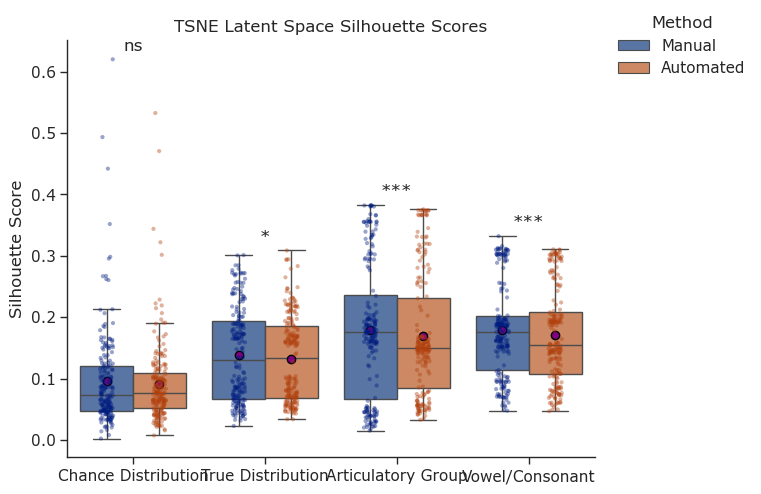

In [125]:
sns.reset_defaults()
sns.set_theme(context='paper', font='Verdana', font_scale=1.25, style='ticks')
g = sns.catplot(
    data=silscor_dfmelted,
    y='Silhouette Score', 
    x='Silhouette Level',
    hue='Method',
    kind='box',
    dodge=True, 
    fill=True,
    legend='full', 
    showfliers=False,
    showmeans=True,
    meanprops={'marker': 'o', 'markerfacecolor': 'purple', 'markeredgecolor': 'black', 'markersize': 6}
)
sns.stripplot(
    silscor_dfmelted, 
    y='Silhouette Score', 
    x='Silhouette Level',
    hue='Method',
    palette='dark',
    dodge=True,
    legend=False,
    size=3,
    alpha=0.4
)

levels = silscor_dfmelted['Silhouette Level'].unique()

for i, level in enumerate(levels):
    sub_df = silscor_dfmelted[silscor_dfmelted['Silhouette Level'] == level]
    scores_manual = sub_df[sub_df['Method'] == 'Manual']['Silhouette Score'].to_numpy()
    scores_auto = sub_df[sub_df['Method'] == 'Automated']['Silhouette Score'].to_numpy()
    
    #stat, p_val = mannwhitneyu(scores_manual, scores_auto)
    #stat, p_val = ttest_ind(scores_manual, scores_auto, equal_var=False)
    stat, p_val = wilcoxon(scores_manual, scores_auto)
    # Create significance label
    sig_label = ''
    if p_val < 0.001:
        sig_label = '***'
    elif p_val < 0.01:
        sig_label = '**'
    elif p_val < 0.05:
        sig_label = '*'
    else:
        sig_label = 'ns'
    
    # Annotate just above max score
    y_max = sub_df['Silhouette Score'].max()
    g.ax.text(i, y_max + 0.01, f"{sig_label}", ha='center', va='bottom', fontsize=12)
plt.title('TSNE Latent Space Silhouette Scores')
g.set(xlabel=None)
plt.tight_layout()
sns.despine()
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1), title='Method')
#plt.savefig(r"Figures\Figure 3\manualvsautomated_TSNEsilhouettevvS26.svg", format='svg')
plt.show()

In [126]:
colorsmap = {
    'Manual': px.colors.qualitative.Vivid[1],
    'Automated': px.colors.qualitative.Vivid[0]
}

silscor_dfmeltedvs = silscor_dfmelted[silscor_dfmelted['Silhouette Level'] == 'True Distribution']

fig = px.box(
    silscor_dfmeltedvs,
    y='Silhouette Score',
    x='Silhouette Level',
    color='Method',
    points='all',  # Shows stripplot-like points
    boxmode='group',
    color_discrete_sequence= px.colors.qualitative.Vivid, 
    color_discrete_map= colorsmap    
    )
fig.update_traces(marker=dict(size=4,opacity=0.9), jitter=0.3, boxmean=True)

# Add significance annotations manually
levels = silscor_dfmeltedvs['Silhouette Level'].unique()

for i, level in enumerate(levels):
    sub_df = silscor_dfmeltedvs[silscor_dfmeltedvs['Silhouette Level'] == level]
    scores_manual = sub_df[sub_df['Method'] == 'Manual']['Silhouette Score'].to_numpy()
    scores_auto = sub_df[sub_df['Method'] == 'Automated']['Silhouette Score'].to_numpy()
    
    stat, p_val = wilcoxon(scores_manual, scores_auto)

    # Define label
    sig_label = 'ns'
    if p_val < 0.001:
        sig_label = '***'
    elif p_val < 0.01:
        sig_label = '**'
    elif p_val < 0.05:
        sig_label = '*'

    # Compute annotation Y position
    y_max = sub_df['Silhouette Score'].max()
    fig.add_trace(go.Scatter(
        x=[level],
        y=[y_max + 0.01],
        mode='text',
        text=[sig_label],
        textposition='top center',
        showlegend=False
    ))

# Styling
fig.update_layout(
    title="TSNE Latent Space Silhouette Scores",
    boxmode="group",
    yaxis_title="Silhouette Score",
    legend_title="Method",
    template='simple_white',
)
# plt.savefig(r"Figures\Figure 3\manualvsautomated_TSNEsilhouetteS26.svg", format='svg')
#fig.write_image(r"Figures\Figure 3\manualvsautomated_TSNEsilhouetteS26PhonPlotly.pdf", format='pdf')
fig.show()

In [127]:
silscor_dfmelted.columns

Index(['Patient', 'Method', 'Silhouette Level', 'Iteration',
       'Silhouette Score'],
      dtype='object')

In [128]:
colorsmap = {
    'Manual': px.colors.qualitative.Vivid[1],
    'Automated': px.colors.qualitative.Vivid[0]
}
# plot order true first then chance
orderforplot = {
    "Difference_Variable": ['Onset', 'Offset', 'Duration'], 
    "Phoneme": ['a', 'ae', 'b', 'g', 'i', 'k', 'p', 'u', 'v'], 
    "Patient": ['S1', 'S2', 'S3', 'S4'],
    'Silhouette Level':['True Distribution', 'Chance Distribution'] }

silscor_dfmelted2 = silscor_dfmelted[(silscor_dfmelted['Silhouette Level'] == 'True Distribution') | (silscor_dfmelted['Silhouette Level'] == 'Chance Distribution')]
# keep S26 only
#silscor_dfmelted2 = silscor_dfmelted2[silscor_dfmelted2['Patient'] == 'S26']
fig = px.box(
    silscor_dfmelted2,
    y='Silhouette Score',
    x='Silhouette Level',
    color='Method',
    points='all',  # Shows stripplot-like points
    boxmode='group',
    color_discrete_sequence= px.colors.qualitative.Vivid, 
    color_discrete_map= colorsmap, 
    category_orders=orderforplot,
    hover_name='Silhouette Level', 
    hover_data= ['Patient', 'Method', 'Silhouette Level', 'Iteration',
       'Silhouette Score']    
    )
fig.update_traces(marker=dict(size=4,opacity=0.9), jitter=0.3, boxmean=True)

# Add significance annotations manually
levels = silscor_dfmelted2['Silhouette Level'].unique()

for i, level in enumerate(levels):
    sub_df = silscor_dfmelted2[silscor_dfmelted2['Silhouette Level'] == level]
    scores_manual = sub_df[sub_df['Method'] == 'Manual']['Silhouette Score'].to_numpy()
    scores_auto = sub_df[sub_df['Method'] == 'Automated']['Silhouette Score'].to_numpy()
    
    stat, p_val = wilcoxon(scores_manual, scores_auto)

    # Define label
    sig_label = 'ns'
    if p_val < 0.001:
        sig_label = '***'
    elif p_val < 0.01:
        sig_label = '**'
    elif p_val < 0.05:
        sig_label = '*'

    # Compute annotation Y position
    y_max = sub_df['Silhouette Score'].max()
    fig.add_trace(go.Scatter(
        x=[level],
        y=[y_max + 0.01],
        mode='text',
        text=[sig_label],
        textposition='top center',
        showlegend=False
    ))


mm_to_px = 3.78
fig.update_layout(
    title=dict(text="TSNE Latent Space Silhouette Scores", font=dict(size=12)),
    boxmode="group",
    yaxis_title=dict(text="Silhouette Score", font=dict(size=10)),
    xaxis_title="",
    legend_title=dict(text="Method", font=dict(size=10)),
    template='simple_white',
    width=200 * mm_to_px,   
    height=150 * mm_to_px,  
    font=dict(size=10)
)
# plt.savefig(r"Figures\Figure 3\manualvsautomated_TSNEsilhouetteS26.svg", format='svg')
#fig.write_image(r"Figures\Figure 3\manualvsautomated_TSNEsilhouetteS26PhonChancePlotly.pdf", format='pdf')
fig.show()

In [129]:
colorsmap = {
    'Manual': px.colors.qualitative.Vivid[1],
    'Automated': px.colors.qualitative.Vivid[0]
}
# plot order true first then chance


#silscor_dfmelted2 = silscor_dfmelted2[silscor_dfmelted2['Patient'] == 'S26']
fig = px.box(
    silscor_dfmelted2,
    y='Silhouette Score',
    x='Silhouette Level',
    facet_col='Patient',
    color='Method',
    points='all',  # Shows stripplot-like points
    boxmode='group',
    color_discrete_sequence= px.colors.qualitative.Vivid, 
    color_discrete_map= colorsmap, 
    category_orders=orderforplot,
    hover_name='Silhouette Level', 
    hover_data= ['Patient', 'Method', 'Silhouette Level', 'Iteration',
       'Silhouette Score']    
    )
fig.update_traces(marker=dict(size=4,opacity=0.9), jitter=0.3, boxmean=True)

# Add significance annotations manually
levels = silscor_dfmelted2['Silhouette Level'].unique()

for i, level in enumerate(levels):
    sub_df = silscor_dfmelted2[silscor_dfmelted2['Silhouette Level'] == level]
    scores_manual = sub_df[sub_df['Method'] == 'Manual']['Silhouette Score'].to_numpy()
    scores_auto = sub_df[sub_df['Method'] == 'Automated']['Silhouette Score'].to_numpy()
    
    stat, p_val = wilcoxon(scores_manual, scores_auto)

    # Define label
    sig_label = 'ns'
    if p_val < 0.001:
        sig_label = '***'
    elif p_val < 0.01:
        sig_label = '**'
    elif p_val < 0.05:
        sig_label = '*'

    # Compute annotation Y position
    y_max = sub_df['Silhouette Score'].max()
    fig.add_trace(go.Scatter(
        x=[level],
        y=[y_max + 0.01],
        mode='text',
        text=[sig_label],
        textposition='top center',
        showlegend=False
    ))


mm_to_px = 3.78
fig.update_layout(
    title=dict(text="TSNE Latent Space Silhouette Scores", font=dict(size=12)),
    boxmode="group",
    yaxis_title=dict(text="Silhouette Score", font=dict(size=10)),
    xaxis_title="",
    legend_title=dict(text="Method", font=dict(size=10)),
    template='simple_white',
    width=200 * mm_to_px,   
    height=150 * mm_to_px,  
    font=dict(size=10)
)
# plt.savefig(r"Figures\Figure 3\manualvsautomated_TSNEsilhouetteS26.svg", format='svg')
#fig.write_image(r"Figures\Figure 3\manualvsautomated_TSNEsilhouetteS26PhonChancePlotly.pdf", format='pdf')
fig.show()

In [130]:
silscor_dfmelted2.head()

,Patient,Method,Silhouette Level,Iteration,Silhouette Score
550,S4,Manual,Chance Distribution,1,0.185645
551,S4,Manual,Chance Distribution,2,0.057049
552,S4,Manual,Chance Distribution,3,0.038827
553,S4,Manual,Chance Distribution,4,0.055565
554,S4,Manual,Chance Distribution,5,0.053669


In [131]:
silscor_dfmelted2.Patient.unique()

array(['S4', 'S2', 'S1', 'S3'], dtype=object)

In [132]:
import plotly.express as px
import plotly.graph_objects as go
sns.reset_defaults()

# color mapping


# keep only True and Chance


# extract True and Chance subsets
true_df = silscor_dfmelted2[silscor_dfmelted2['Silhouette Level'] == 'True Distribution']
chance_df = silscor_dfmelted2[silscor_dfmelted2['Silhouette Level'] == 'Chance Distribution']

# compute mean chance silhouette score per Patient × Method
chance_means = chance_df.groupby(['Patient', 'Method'], as_index=False)['Silhouette Score'].mean()

# main plot — true scores only
fig = px.box(
    true_df,
    x='Patient',
    y='Silhouette Score',
    color='Method',
    points='all',
    boxmode='group',
    color_discrete_map=colorsmap,
    hover_name='Patient',
    hover_data=['Patient', 'Method', 'Iteration', 'Silhouette Score'],
    category_orders=orderforplot
    
)

fig.update_traces(marker=dict(size=4, opacity=0.9), jitter=0.3, boxmean=True)

# map each (Patient, Method) combo to x coordinate
x_coords = {p: i for i, p in enumerate(true_df['Patient'].unique())}
method_offset = {'Manual': -0.2, 'Automated': 0.2}  # horizontal shift for group boxes

# add horizontal chance lines beneath each box
for _, row in chance_means.iterrows():
    patient = row['Patient']
    method = row['Method']
    chance_val = row['Silhouette Score']
    x = x_coords[patient] + method_offset[method]

    fig.add_shape(
        type="line",
        x0=x - 0.15,
        x1=x + 0.15,
        y0=chance_val,
        y1=chance_val,
        line=dict(color="gray", dash="dash"),
        xref="x",
        yref="y"
    )

mm_to_px = 3.78
fig.update_layout(
    title=dict(text="t-SNE Silhouette Scores per Patient", font=dict(size=12)),
    boxmode="group",
    yaxis_title=dict(text="Silhouette Score", font=dict(size=10)),
    xaxis_title="Patient",
    legend_title=dict(text="Method", font=dict(size=10)),
    font=dict(size=10))
fig.write_image(r"Figures\Figure 3\October_2025\TSNE Distributions\manualvsautomated_TSNEsilhouetteAllpatientsphonChancePlotly.svg", format='svg', scale=3)
fig.show()


In [133]:
silscor_dfmelted2['Silhouette Level'].unique()

array(['Chance Distribution', 'True Distribution'], dtype=object)

In [134]:
silscor_dfmelted2S1 = silscor_dfmelted2[silscor_dfmelted2['Patient'] == 'S1']
fig = px.box(
    silscor_dfmelted2S1,
    y='Silhouette Score',
    x='Silhouette Level',
    color='Method',
    points='all',  # Shows stripplot-like points
    boxmode='group',
    color_discrete_sequence= px.colors.qualitative.Vivid, 
    color_discrete_map= colorsmap, 
    category_orders=orderforplot    
    )
#fig.update_traces(marker=dict(size=4,opacity=0.9), jitter=0.3, boxmean=True)

# Add significance annotations manually
levels = silscor_dfmelted2S1['Silhouette Level'].unique()

for i, level in enumerate(levels):
    sub_df = silscor_dfmelted2S1[silscor_dfmelted2S1['Silhouette Level'] == level]
    scores_manual = sub_df[sub_df['Method'] == 'Manual']['Silhouette Score'].to_numpy()
    scores_auto = sub_df[sub_df['Method'] == 'Automated']['Silhouette Score'].to_numpy()
    
    stat, p_val = wilcoxon(scores_manual, scores_auto)

    # Define label
    sig_label = 'ns'
    if p_val < 0.001:
        sig_label = '***'
    elif p_val < 0.01:
        sig_label = '**'
    elif p_val < 0.05:
        sig_label = '*'

    # Compute annotation Y position
    y_max = sub_df['Silhouette Score'].max()
    fig.add_trace(go.Scatter(
        x=[level],
        y=[y_max + 0.01],
        mode='text',
        text=[sig_label],
        textposition='top center',
        showlegend=False
    ))


mm_to_px = 3.78
fig.update_layout(
    title=dict(text="TSNE Latent Space Silhouette Scores", font=dict(size=12)),
    boxmode="group",
    yaxis_title=dict(text="Silhouette Score", font=dict(size=10)),
    xaxis_title="",
    legend_title=dict(text="Method", font=dict(size=10)),
    font=dict(size=10)
)
# plt.savefig(r"Figures\Figure 3\manualvsautomated_TSNEsilhouetteS26.svg", format='svg')
fig.write_image(r"Figures\Figure 3\manualvsautomated_TSNEsilhouetteS26PhonChancePlotly.svg ", format='svg', scale=3)
fig.show()

In [135]:
silscor_dfmelted2.head()

,Patient,Method,Silhouette Level,Iteration,Silhouette Score
550,S4,Manual,Chance Distribution,1,0.185645
551,S4,Manual,Chance Distribution,2,0.057049
552,S4,Manual,Chance Distribution,3,0.038827
553,S4,Manual,Chance Distribution,4,0.055565
554,S4,Manual,Chance Distribution,5,0.053669


In [ ]:
from scipy.stats import wilcoxon, mannwhitneyu

true_df = silscor_dfmelted2[silscor_dfmelted2['Silhouette Level'] == 'True Distribution']
chance_df = silscor_dfmelted2[silscor_dfmelted2['Silhouette Level'] == 'Chance Distribution']

patients = sorted(true_df['Patient'].unique())

print("---- Manual vs Automated (True only) ----")
for patient in patients:
    sub_df = true_df[true_df['Patient'] == patient]
    m = sub_df[sub_df['Method'] == 'Manual']['Silhouette Score'].to_numpy()
    a = sub_df[sub_df['Method'] == 'Automated']['Silhouette Score'].to_numpy()
    if len(m) and len(a):
        stat, p = mannwhitneyu(m, a)
        print(f"{patient}: W={stat:.3f}, p={p:.4f}")

print("\n---- True vs Chance (per method) ----")
methods = ['Manual', 'Automated']
for method in methods:
    for patient in patients:
        t = true_df[(true_df['Patient'] == patient) & (true_df['Method'] == method)]['Silhouette Score'].to_numpy()
        c = chance_df[(chance_df['Patient'] == patient) & (chance_df['Method'] == method)]['Silhouette Score'].to_numpy()
        t = t[~np.isnan(t)]
        c = c[~np.isnan(c)]
        if len(t) and len(c):
            stat, p = mannwhitneyu(t, c, alternative='greater')
            print(f"{patient} | {method}: U={stat:.3f}, p={p:.4f}")


---- Manual vs Automated (True only) ----
S1: W=558.000, p=0.4490
S2: W=535.000, p=0.3278
S3: W=185.000, p=0.0000
S4: W=611.000, p=0.8035

---- True vs Chance (per method) ----
S1 | Manual: U=2463.000, p=0.0000
S2 | Manual: U=1621.000, p=0.0053
S3 | Manual: U=1984.000, p=0.0000
S4 | Manual: U=1026.000, p=0.9391
S1 | Automated: U=2475.000, p=0.0000
S2 | Automated: U=1523.000, p=0.0302
S3 | Automated: U=1907.000, p=0.0000
S4 | Automated: U=1048.000, p=0.9186
